In [78]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
df  = pd.read_csv('../data/store.csv')
df.head(5)
#df.groupby(['Promo2']).count()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [40]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [41]:
df.shape

(1115, 10)

In [86]:
df2 = df.copy()
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [87]:
df2['CompetitionDistance'] = df.fillna(value = df['CompetitionDistance'].mean())

In [108]:

df2['Promo2SinceWeek'] = df2['Promo2SinceWeek'].fillna(value = 0 )
df2['Promo2SinceYear'] = df2['Promo2SinceYear'].fillna(value = 0 )
df2['PromoInterval'] = df2['PromoInterval'].fillna(value = 0 )


In [99]:
fill_list= ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']

In [109]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [110]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")



In [112]:
percent_missing(df2)

The dataset contains 6.35 % missing values.


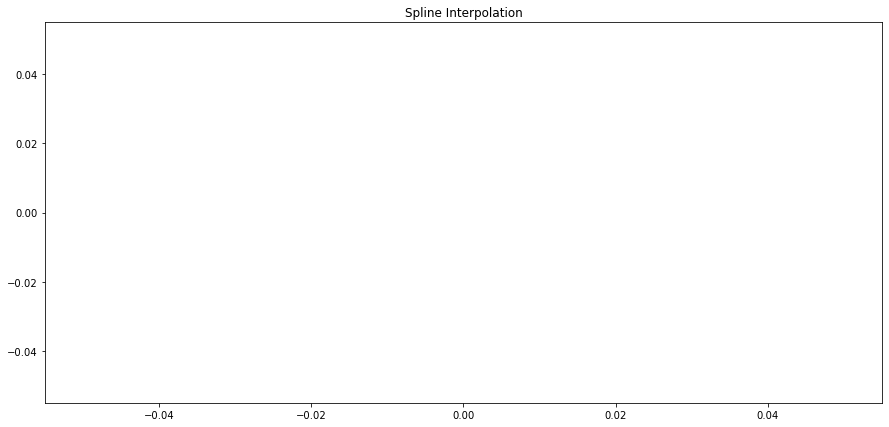

In [81]:
plt.rcParams['figure.figsize']=(15,7)
plt.plot(df['CompetitionOpenSinceYear'], color='blue')
plt.title('Spline Interpolation')
# print the plot
plt.show()

<module 'matplotlib' from 'c:\\Users\\mohammed\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

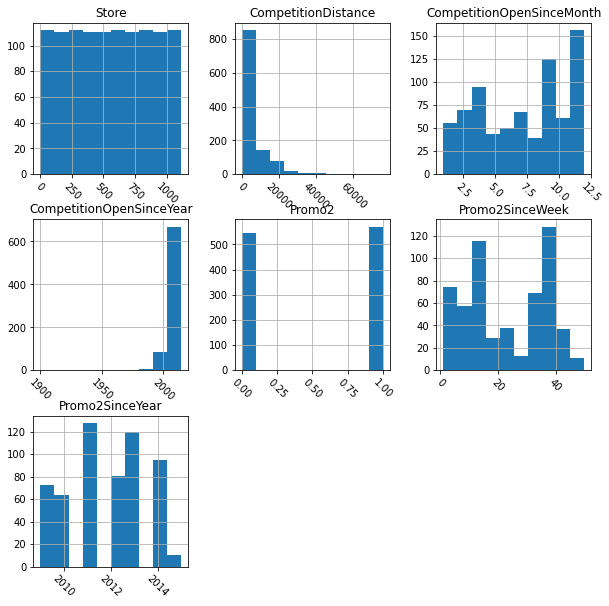

In [67]:
df.hist(xrot=-45,figsize=(10,10))
# Clear the text "residue"
plt

In [48]:
db  = pd.read_csv('../data/train.csv')
db.head(5)
db.groupby(['Promo']).count()

c:\Users\mohammed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,StateHoliday,SchoolHoliday
Promo,,,,,,,,
0,629129,629129,629129,629129,629129,629129,629129,629129
1,388080,388080,388080,388080,388080,388080,388080,388080


In [53]:
percent_missing(db)

The dataset contains 0.0 % missing values.


In [25]:
db.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [26]:
db.shape

(1017209, 9)

In [ ]:
db.hist(xrot=-45,figsize=(10,10))
# Clear the text "residue"
plt.show()